<a href="https://colab.research.google.com/github/Gdkmak/analytics/blob/master/Stock_Market_Analysis_For_Google_and_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis for Tech Stocks

Here we'll analyse data from the stock market for some technology stocks, namly Apple, Microsoft, Amazon, and Google. Main goal here to visualise and take a deep look at different way to analyse the risk of stocks considering their history changes.

Questions that the analysis is trying to find answers to:

- What was the change in a stock's price over time?
- What was the daily return average of a stock?
- What was the moving average of various stocks?
- What was the correlation between daily returns of different stocks?
- How can we attempt to predict future stock behaviour?

In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from pandas_datareader import DataReader
from datetime import datetime

%matplotlib inline

We're going to analyse some tech stocks as mentioned at the beginning, and it seems like a good idea to look at their performance during the pandemic. We can create a list with the stock names, for future looping.

In [73]:
# Apple, Google, Microsoft, and Amazon, these stocks we are interested in: 
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year, end.month-7 ,end.day) # beginning of the pandemic
# 
# Yahoo Finance has a nice method to grab the stock data
for stock in tech_list:
  try:
    globals()[stock] = DataReader(stock,'yahoo',start,end) 
  except: 
    pass

Thanks to the globals method, Apple's stock data will be stored in the AAPL global variable dataframe. Let's see if that worked.

In [23]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-27,311.769989,304.880005,310.059998,308.950012,40485000.0,306.833191
2020-01-28,318.399994,312.190002,312.600006,317.690002,40558500.0,315.513306
2020-01-29,327.850006,321.380005,324.450012,324.339996,54057300.0,322.117737
2020-01-30,324.089996,318.750000,320.540009,323.869995,31685800.0,321.650970
2020-01-31,322.679993,308.290009,320.929993,309.510010,49897100.0,307.389374


In [24]:
# basic stats summary for Apple's Stock
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,147.000000,147.000000,147.000000,147.000000,1.470000e+02,147.000000
mean,334.561973,324.921088,329.180817,330.217822,4.358145e+07,329.270396
std,61.043177,61.036702,61.182893,61.438251,1.928307e+07,61.753306
min,228.500000,212.610001,228.080002,224.369995,2.002840e+07,223.361542
25%,288.225006,280.290009,283.544998,286.869995,2.934700e+07,285.580643
50%,322.350006,316.470001,318.660004,319.000000,3.839950e+07,318.173462
75%,371.175003,362.955002,365.059998,365.684998,5.053115e+07,365.026855
max,515.140015,495.750000,514.789978,503.429993,1.067212e+08,503.429993


And that easily, we can make out what the stock's minimum, maximum, and average price was for the last year. 

In [25]:
#Some basic info about the pandas dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147 entries, 2020-01-27 to 2020-08-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       147 non-null    float64
 1   Low        147 non-null    float64
 2   Open       147 non-null    float64
 3   Close      147 non-null    float64
 4   Volume     147 non-null    float64
 5   Adj Close  147 non-null    float64
dtypes: float64(6)
memory usage: 8.0 KB


No missing info in the dataframe above, so we are good to go.

### Q1.What's the change in stock's price over time?

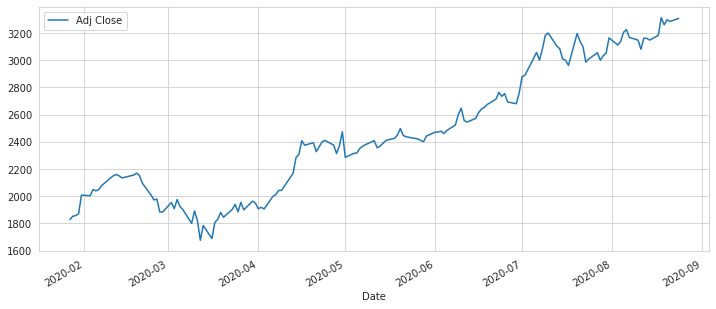

In [130]:
# #Plotting the stock's adjusted closing price 
AMZN['Adj Close'].plot(legend=True,figsize=(12,5))

Similarily, we can plot change in a stock's volume being traded, over time.

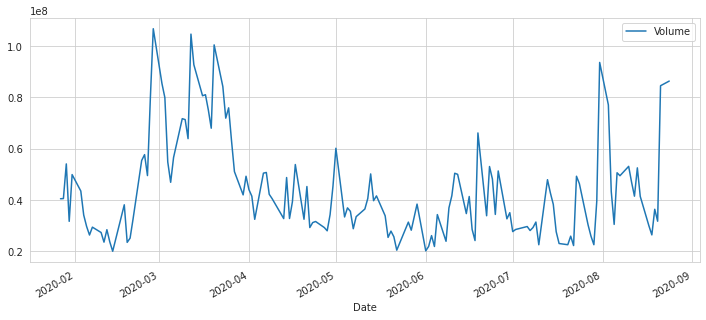

In [33]:
# the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

### What was the moving average of various stocks?

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [58]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma, center=False).mean()

AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2020-08-18,464.000000,456.029999,457.410004,462.250000,26408400.0,462.250000,451.949768,422.997151,388.540184
2020-08-19,468.649994,462.440002,463.929993,462.829987,36384500.0,462.829987,454.287003,426.719164,390.929366
2020-08-20,473.570007,462.929993,463.000000,473.100006,31726800.0,473.100006,456.118002,431.838583,393.347267
2020-08-21,499.470001,477.000000,477.049988,497.480011,84513700.0,497.480011,461.421002,438.222922,396.590958
2020-08-24,515.140015,495.750000,514.789978,503.429993,86326400.0,503.429993,466.673001,444.466550,399.895754


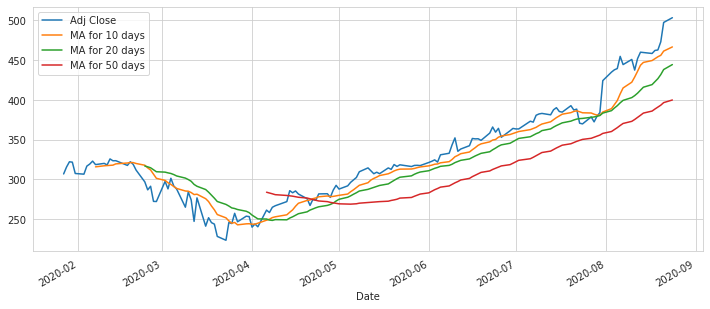

In [35]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

Moving averages for more days have a smoother and more readable plot, as they're less reliable on daily fluctuations. So even though, Apple's stock started to decline near the start of March, during April onward it's been on an upward trend.

### Q2. What was the daily return average of a stock?

In [61]:
# daily return (DR) is the difference between the opening price and closing price. It can be created by pandas using the percentage change over the adjusted closing price
AAPL['DR'] = AAPL['Adj Close'].pct_change()

In [64]:
AAPL['DR'].tail()

Date
2020-08-18    0.008333
2020-08-19    0.001255
2020-08-20    0.022190
2020-08-21    0.051532
2020-08-24    0.011960
Name: DR, dtype: float64

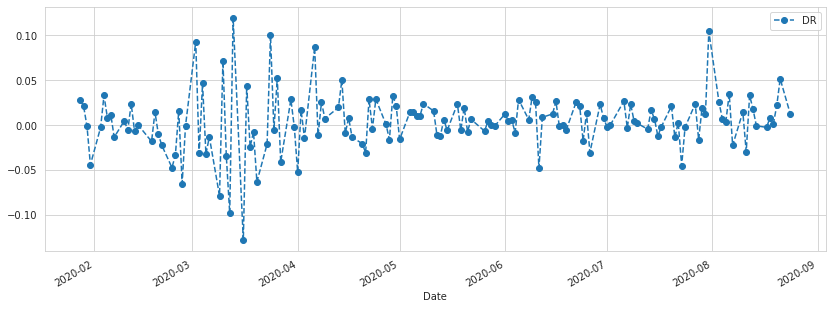

In [65]:
# plotting the daily return
AAPL['DR'].plot(figsize=(14,5), legend=True,
                linestyle='--', marker='o')

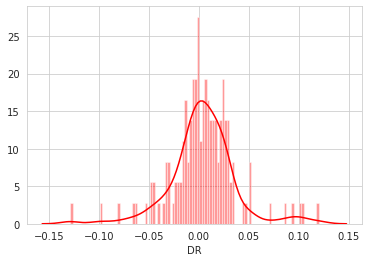

In [66]:
sns.distplot(AAPL['DR'].dropna(), bins=100, color='red')

Negative daily returns seem to be slightly more frequent than positive returns for Apple.

### Q3. What was the correlation between daily returns of different stocks?

In [74]:
# we will bring the other companies''Adj Close' column and let's check if there is any correlation in the daily returns 
all_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [75]:
close_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,YHOO
Date,,,,,
2020-08-18,462.250000,1558.599976,210.979996,3312.489990,NaN
2020-08-19,462.829987,1547.530029,209.699997,3260.479980,NaN
2020-08-20,473.100006,1581.750000,214.580002,3297.370117,NaN
2020-08-21,497.480011,1580.420044,213.020004,3284.719971,NaN
2020-08-24,503.429993,1588.199951,213.690002,3307.459961,NaN


In [77]:
# calculate the daily returns

dr_df = all_df.pct_change()
dr_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-08-18,0.008333,0.026759,0.005754,0.040875
2020-08-19,0.001255,-0.007102,-0.006067,-0.015701
2020-08-20,0.022190,0.022113,0.023271,0.011314
2020-08-21,0.051532,-0.000841,-0.007270,-0.003836
2020-08-24,0.011960,0.004923,0.003145,0.006923


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself to see how the data points are perfectly linearly plotted. 

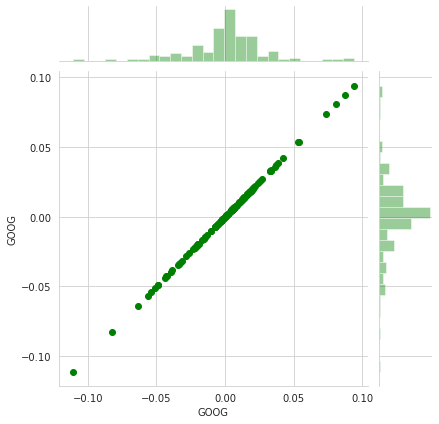

In [78]:
sns.jointplot('GOOG', 'GOOG', dr_df, kind='scatter', color='green')

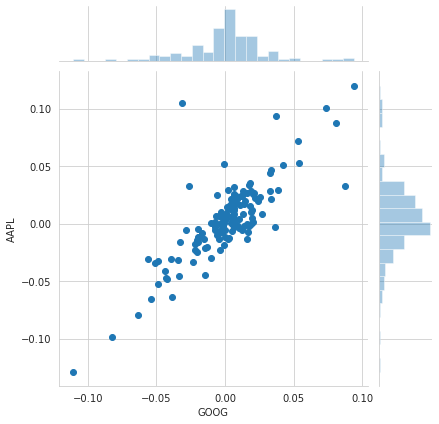

In [80]:
# compare it with Apple stock 

sns.jointplot('GOOG', 'AAPL', dr_df,kind='scatter')

There seems to be a high correlation between the two stocks, looking at the figure above. Let's check the others?

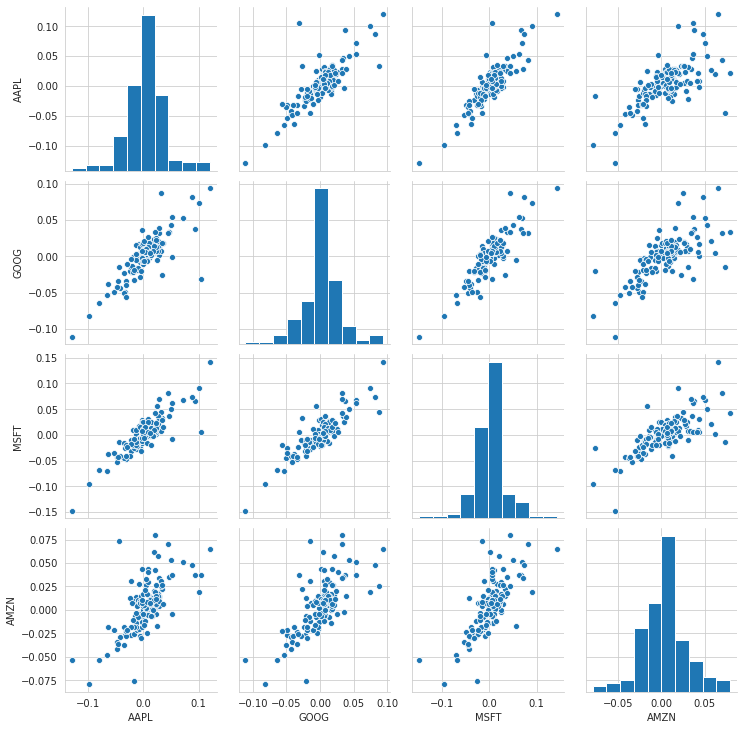

In [81]:
sns.pairplot(dr_df.dropna())

Google and Microsoft seem to have the highest correlation. But another interesting thing to note is that all tech companies that we explored are positively correlated.

### Q4. How much value do we put at risk by investing in a particular stock?

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns. 

In [90]:
rets = dr_df.dropna()

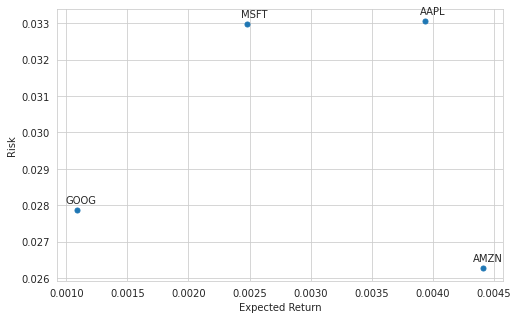

In [106]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# label the point
for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y),
                xytext=(20, 5),
                textcoords = 'offset points', ha = 'right', va = 'bottom')

We'd want a stock to have a high expected return and a low risk; Google and Amazon seem to be the safe options for that. Meanwhile, Apple and Microsoft stocks have higher expected returns, but also have a higher risk. 

### Q5. How can we attempt to predict future stock behaviour?

__Monte Carlo Method__

Check out this [link](http://www.investopedia.com/articles/07/montecarlo.asp) for more info on the Monte Carlo method. Monte Carlo is a way to simulate a future outcomes, and aggregate the results in the end for some quantifiable value.

In [152]:
days = GOOG.shape[0]
# delta t
dt = 1 / days
mu = rets.mean()['GOOG']
std = rets.std()['GOOG']

In [195]:
def MC_stock_sim(last_price, days, mu, std):
    """
    Input:  
      last_price: open value in the stock dataset 
      day: number of day to predict
      mu: mean of Adj Close
      std: standard deviation of Adj Close
    Resturn:
      price: list of prices for the next 365 days

    """    
    price = []
    shock = 0
    drift = 0
    
    price.append(start_price)
    
    for x in range(1, days):    
        # calculate shock and the drift
        shock = np.random.normal(loc=mu * dt, scale=(std * np.sqrt(dt)))
        drift = mu * dt   
        price.append(price[-1] + (price[-1] * (drift + shock)))
        
    return price

We're going to run the simulation of Google stocks for it's open value.

Let's do a simulation of 100 runs, and plot them.

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

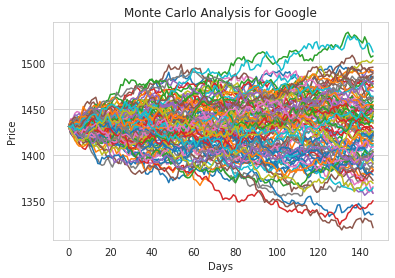

In [197]:
last_price = GOOG['Open'][-1]

for run in range(100):
    plt.plot(MC_stock_sim(last_price, days, mu, std))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [198]:
runs = 10000

simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = MC_stock_sim(start_price, days, mu, std)[days-1] # last

Text(0.5, 1.0, 'Final price distribution for Google Stock after 147 days')

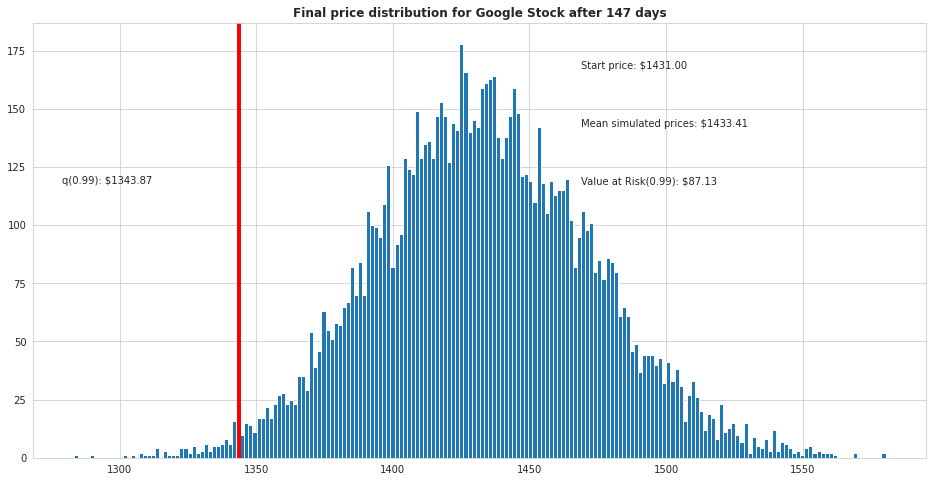

In [200]:
q = np.percentile(simulations, 1)

plt.figure(figsize=(16,8))
plt.hist(simulations, bins=200)
plt.figtext(0.6, 0.8, f"Start price: ${start_price:.2f}")
plt.figtext(0.6, 0.7, f"Mean simulated prices: ${simulations.mean():.2f}")
plt.figtext(0.6, 0.6, f"Value at Risk(0.99): ${start_price - q:.2f}")
plt.figtext(0.15, 0.6, f"q(0.99): ${q:.2f}")
plt.axvline(x=q, linewidth=4, color='r')
plt.title(f"Final price distribution for Google Stock after {days} days", weight='bold')

We can infer from this that, Google's stock is kinda of stable. The starting price that we had was USD1431.00, and the mean final price over 10,000 runs was USD1433.41. 
The red line indicates the Value at Risk at the desired confidence interval. For every stock, we'd be risking $87.13, 99% of the time.